In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [4]:
data = np.genfromtxt('C:\\Users\\Administrator\\python课程资料\\机器学习\\程序\\回归\\data.csv',delimiter=',')

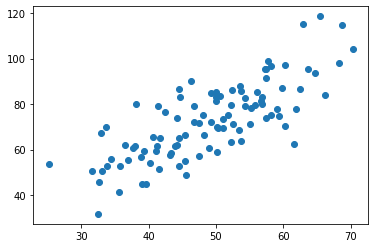

In [5]:
x_data = data[:,0,np.newaxis]  #将数据处理成2维
y_data = data[:,1,np.newaxis]  #将数据处理成2维
plt.scatter(x_data,y_data)
plt.show()

In [6]:
print(np.mat(x_data).shape)  #将x_data用np.mat命令变成矩阵（matrix）
print(np.mat(y_data).shape)
#给样本添加偏置值=1
#原本100行1列的矩阵→100行2列
#np.ones((100,1))内容都是1,100行1列
#axis=1表示列方向合并
X_data = np.concatenate((np.ones((100,1)),x_data),axis=1)
print(X_data.shape)

(100, 1)
(100, 1)
(100, 2)


In [7]:
print(X_data[:3])  #1相当于x0,32.5相当于x1（特征）

[[ 1.         32.50234527]
 [ 1.         53.42680403]
 [ 1.         61.53035803]]


In [8]:
#标准方程法求解回归参数
def weights(xArr,yArr):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    #从numpy array→numpy matrix可以方便的使用矩阵之间的一些运算
    xTx = xMat.T*xMat  
    #计算矩阵的值，如果值为0，说明该矩阵没有逆矩阵
    #np.linalg.det()可以求矩阵的值
    if np.linalg.det(xTx) == 0.0:
        print('This matrix cannot do inverse')
        return
    ws = xTx.I*xMat.T*yMat  #.I是逆矩阵的含义
    return ws

In [9]:
ws = weights(X_data,y_data)
print(ws)

[[7.99102098]
 [1.32243102]]


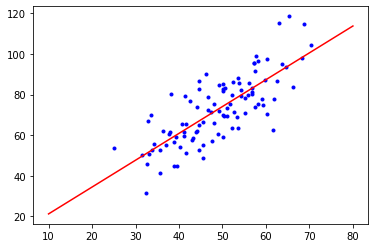

In [10]:
#画图
x_test = np.array([[10],[80]])
y_test = ws[0] + x_test*ws[1]
plt.plot(x_data,y_data,'b.')
plt.plot(x_test,y_test,'r')
plt.show()

In [11]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these